# K - Nearest Neighbors
K-Nearest Neighbors** is an algorithm for supervised learning. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

In [1]:
import itertools #basic tools for iteration
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker # Ticks are the values used to show specific points on the coordinate axis. It can be a number or a string. 
from sklearn import preprocessing
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
correct_lables = pd.read_csv('gender_submission.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AEAAE66BA8>,
      dtype=object)

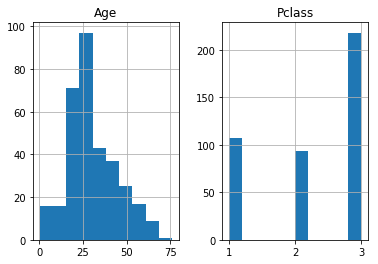

In [3]:
colors = ['g', 'b']
test.hist(column=['Age', 'Pclass'])

In [4]:
train.drop([ 'Name', 'Ticket', 'Age', 'Embarked', 'Cabin'], axis=1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,1,0,3,male,1,0,7.2500
1,2,1,1,female,1,0,71.2833
2,3,1,3,female,0,0,7.9250
3,4,1,1,female,1,0,53.1000
4,5,0,3,male,0,0,8.0500


In [5]:
gender = []
for i in train.Sex:
    if i == 'male':
        gender.append(0)
    else:
        gender.append(1)
train['gender'] = gender
train = train.drop('Sex', axis=1)
train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,gender
0,1,0,3,1,0,7.2500,0
1,2,1,1,1,0,71.2833,1
2,3,1,3,0,0,7.9250,1
3,4,1,1,1,0,53.1000,1
4,5,0,3,0,0,8.0500,0


In [6]:
x = train[['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'gender']].values #To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array
y = train['Survived'].values #labels
y[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [7]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float)) #Normalize Data
#Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:
x

array([[-1.73010796,  0.82737724,  0.43279337, -0.47367361, -0.50244517,
        -0.73769513],
       [-1.72622007, -1.56610693,  0.43279337, -0.47367361,  0.78684529,
         1.35557354],
       [-1.72233219,  0.82737724, -0.4745452 , -0.47367361, -0.48885426,
         1.35557354],
       ...,
       [ 1.72233219,  0.82737724,  0.43279337,  2.00893337, -0.17626324,
         1.35557354],
       [ 1.72622007, -1.56610693, -0.4745452 , -0.47367361, -0.04438104,
        -0.73769513],
       [ 1.73010796,  0.82737724, -0.4745452 , -0.47367361, -0.49237783,
        -0.73769513]])

In [8]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [9]:
test.drop([ 'Name', 'Ticket', 'Age', 'Embarked', 'Cabin'], axis=1, inplace = True)
test.head()
gender1 = []
for i in test.Sex:
    if i == 'male':
        gender1.append(0)
    else:
        gender1.append(1)
test['gender'] = gender1
test = test.drop('Sex', axis=1)
test.fillna(8, inplace = True)

In [10]:
xtest = test[['PassengerId', 'Pclass' , 'SibSp', 'Parch', 'Fare', 'gender']].values #To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array
xtest = preprocessing.StandardScaler().fit(xtest).transform(xtest.astype(float))
yhat = neigh.predict(xtest)
yhat[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [23]:
ytest = correct_lables[ 'Survived']
#ytest = preprocessing.StandardScaler().fit(ytest).transform(ytest.astype(float))

In [22]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y, neigh.predict(x)))
print("Test set Accuracy: ", metrics.accuracy_score(ytest, yhat))

Train set Accuracy:  0.8540965207631874
Test set Accuracy:  0.8779904306220095


In [54]:
# for k = 6
k = 9
train6 = KNeighborsClassifier(n_neighbors = k).fit(x,y)
predict6 = train6.predict(xtest)
print("Train set Accuracy: ", metrics.accuracy_score(y, train6.predict(x)))
print("Test set Accuracy: ", metrics.accuracy_score(ytest, predict6))

Train set Accuracy:  0.8148148148148148
Test set Accuracy:  0.8971291866028708
